# **PROJECT - 2 : FIFA World Cup Analysis**
Author : Amaan Haque

Domain of Internship : Data Analyst

Company : Unified Mentor

# **IMPORTING ALL THE ESSENTIAL LIBRARIES AND UPLOADING THE DATASET**

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
data1=pd.read_csv(r"/content/drive/MyDrive/WorldCupMatches.csv")
data2=pd.read_csv(r"/content/drive/MyDrive/WorldCupPlayers.csv")
data3=pd.read_csv(r"/content/drive/MyDrive/WorldCups.csv")


In [70]:
# Inspect the data structure
data1.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [71]:
data2.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [72]:
data3.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


# **DATA CLEANING AND TRANSFORMATION**

In [73]:
# Check for missing values in each dataset
print("Missing values in Matches dataset:\n", data1.isnull().sum())
print("\n\nMissing values in Players dataset:\n", data2.isnull().sum())
print("\n\nMissing values in World Cups dataset:\n", data3.isnull().sum())

# Fill or drop missing values as appropriate
# Example: Fill missing attendance values with median
data3['Attendance'] = pd.to_numeric(data3['Attendance'].replace({',': '', '.': ''}, regex=True), errors='coerce')
data3['Attendance'] = data3['Attendance'].fillna(data3['Attendance'].median())

# Drop rows with missing values for essential columns in the Matches dataset
data1.dropna(subset=['Home Team Name', 'Away Team Name'], inplace=True)

Missing values in Matches dataset:
 Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64


Missing values in Players dataset:
 RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33641
Event            28715
dtype: int64


Missing values in World Cups dataset:
 Year              0
Country           0
Winner            0
Runners-Up  

In [74]:
# Convert Year to integer and verify
data3['Year'] = data3['Year'].astype(int)
data1['Year'] = data1['Year'].astype(int)

In [75]:
# Remove duplicates if any
data1.drop_duplicates(inplace=True)
data2.drop_duplicates(inplace=True)
data3.drop_duplicates(inplace=True)

In [76]:
# Feature: Goal Difference in Matches
data1['Goal Difference'] = abs(data1['Home Team Goals'] - data1['Away Team Goals'])

# Feature: Total Goals in each World Cup
data3['Total Goals'] = data3['GoalsScored']

# DATA ANALYSIS...

# **GOALS SCORED OVER THE WORLD CUPS**

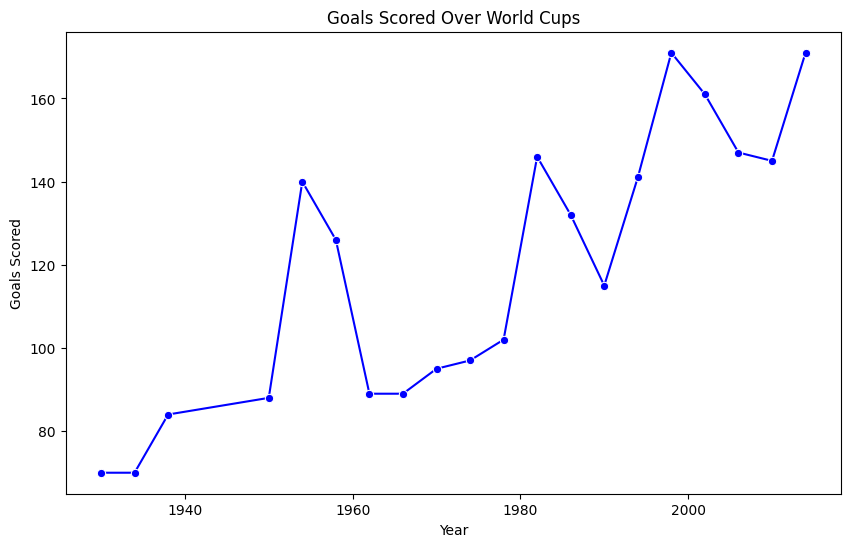

In [77]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data3, x='Year', y='GoalsScored', marker='o', color='b')
plt.title('Goals Scored Over World Cups')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.show()

1. **Goals Scored Over World Cups:** The line plot shows an overall increasing trend in goals scored throughout World Cup history, with some fluctuations.

---



# **TOP 10 COUNTRIES WITH MOST WCs**

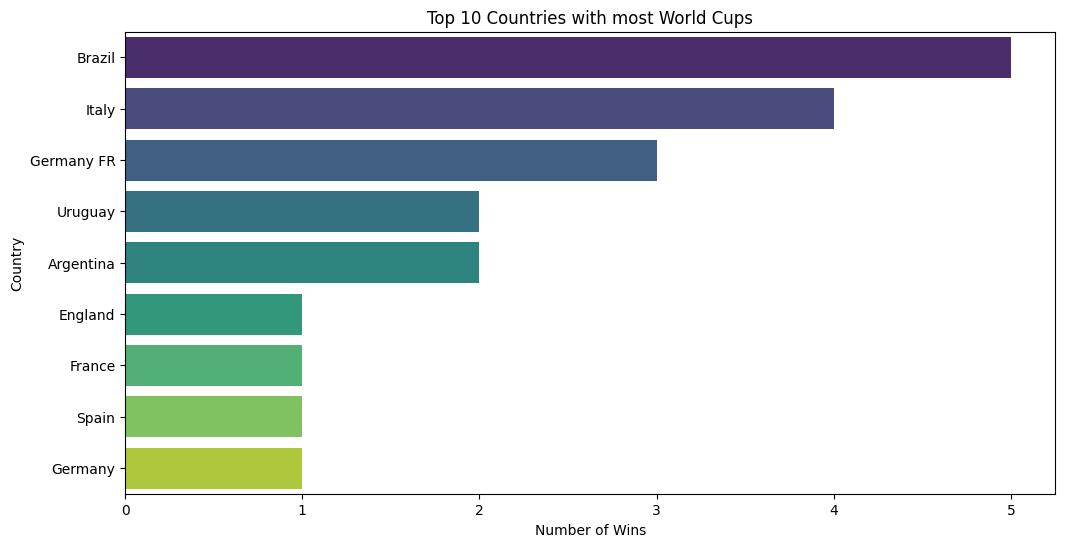

In [78]:
top_winners = data3['Winner'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_winners.values, y=top_winners.index, palette='viridis', hue = top_winners.index, legend=False)
plt.title('Top 10 Countries with most World Cups')
plt.xlabel('Number of Wins')
plt.ylabel('Country')
plt.show()

2. **Top 10 Countries with Most World Cups:** Brazil is the clear leader, with 5 World Cup titles, followed by Germany and Italy.

---



# **COUNTRIES WITH MOST WC(1st), RUNNERS-UP AND 3rd POSITION**

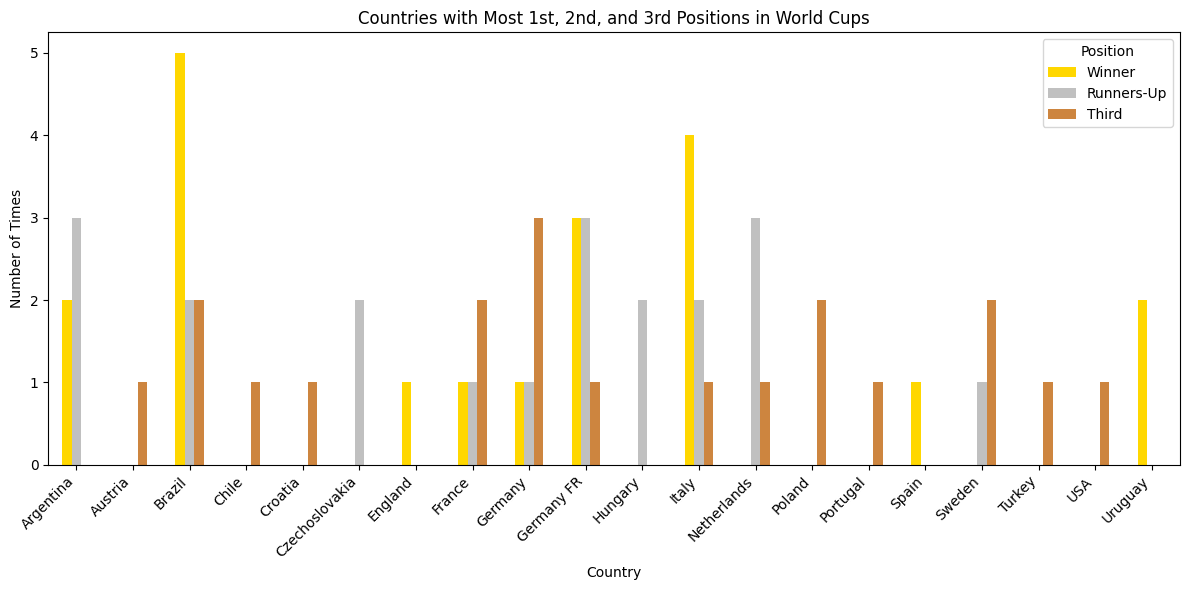

In [79]:
winners = data3['Winner'].value_counts()
runners_up = data3['Runners-Up'].value_counts()
third_place = data3['Third'].value_counts()

positions_df = pd.DataFrame({'Winner': winners, 'Runners-Up': runners_up, 'Third': third_place})

positions_df.plot(kind='bar', figsize=(12, 6), color=['gold', 'silver', 'peru'])
plt.title('Countries with Most 1st, 2nd, and 3rd Positions in World Cups')
plt.xlabel('Country')
plt.ylabel('Number of Times')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Position')
plt.tight_layout()
plt.show()

3. **Countries with Most 1st, 2nd, and 3rd Positions:** The bar chart reinforces Brazil's dominance, with Germany also showing a strong record in all three positions.

---



# **AVERAGE GOALS PER MATCH OVER THE YEARS**

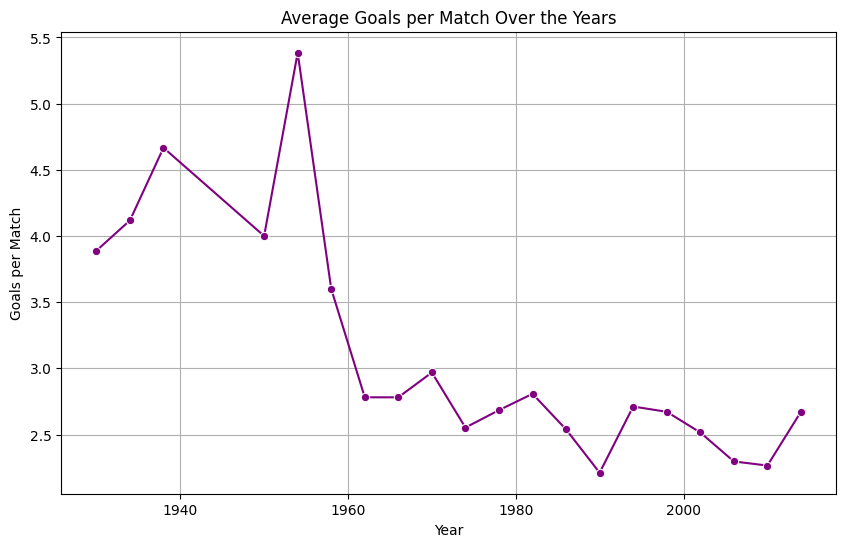

In [80]:
# Adding a new feature: Goals per Match
data3['GoalsPerMatch'] = data3['GoalsScored'] / data3['MatchesPlayed']

plt.figure(figsize=(10, 6))
sns.lineplot(data = data3, x='Year', y='GoalsPerMatch', marker='o', color='purple')
plt.title('Average Goals per Match Over the Years')
plt.xlabel('Year')
plt.ylabel('Goals per Match')
plt.grid()
plt.show()


4. **Average Goals per Match Over the Years:** The line plot reveals that average goals per match peaked around the 1950s and has generally declined since then.

---



# **TOP 10 MOST GOAL SCORING COUNTRIES**

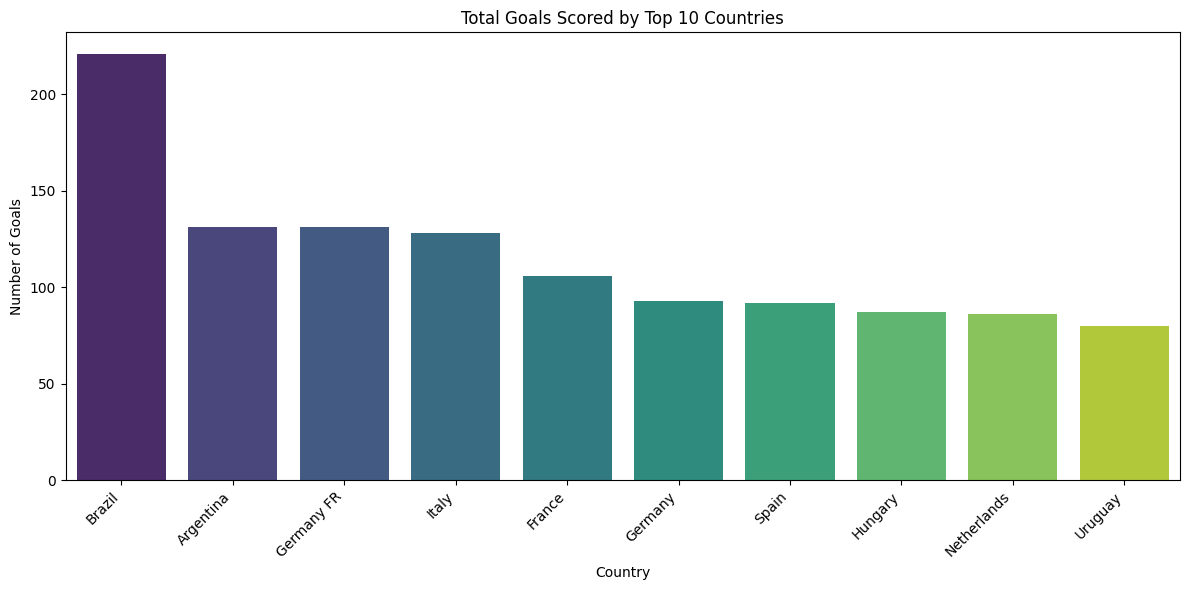

In [81]:
# Group by 'Home Team Name' and sum 'Home Team Goals'
home_goals = data1.groupby('Home Team Name')['Home Team Goals'].sum()

# Group by 'Away Team Name' and sum 'Away Team Goals'
away_goals = data1.groupby('Away Team Name')['Away Team Goals'].sum()

# Concatenate and sum goals for each country
total_goals = pd.concat([home_goals, away_goals]).groupby(level=0).sum()

# Sort values in descending order
total_goals = total_goals.sort_values(ascending=False)

# Select top 10 countries
top_10_countries = total_goals.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='viridis', hue = top_10_countries.index, legend=False)
plt.title('Total Goals Scored by Top 10 Countries')
plt.ylabel('Number of Goals')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

5. **Top 10 Most Goal Scoring Countries:** Brazil has scored the most goals overall, followed by Germany and Argentina. This aligns with their overall success in the tournament.

---



# **DISTRIBUTION OF WINNING MARGINS IN WC MATCHES**

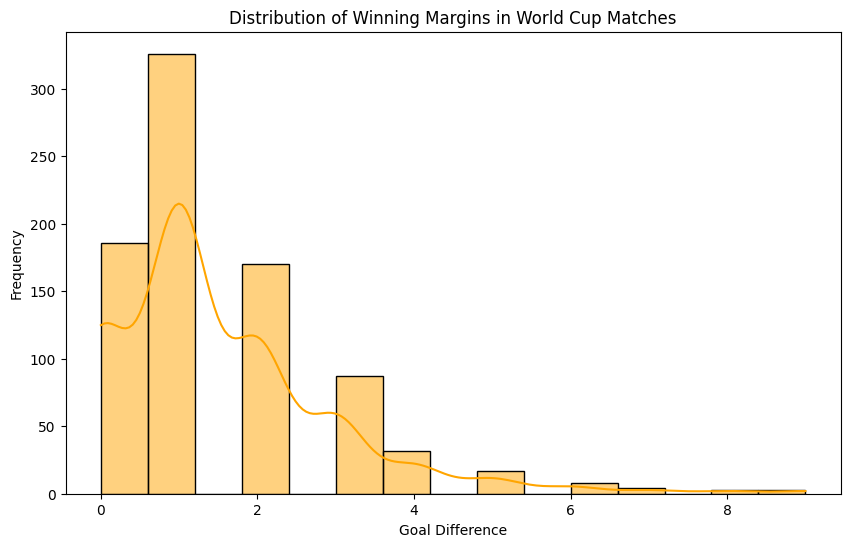

In [82]:
# Plotting goal differences in matches
data1['Goal Difference'] = abs(data1['Home Team Goals'] - data1['Away Team Goals'])

plt.figure(figsize=(10, 6))
sns.histplot(data1['Goal Difference'], bins=15, kde=True, color='orange')
plt.title('Distribution of Winning Margins in World Cup Matches')
plt.xlabel('Goal Difference')
plt.ylabel('Frequency')
plt.show()


6.**Distribution of Winning Margins in World Cup Matches:** The histogram shows that most matches are decided by a small goal difference, with a peak around 1 or 2 goals.

---



# **TOP 10 PLAYERS BY MATCH APPEARANCES**

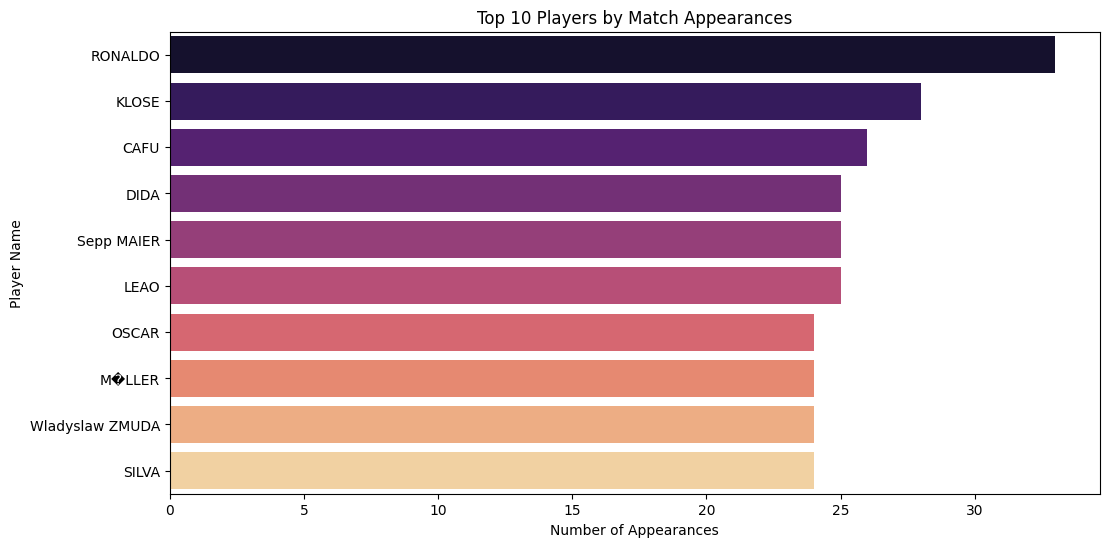

In [83]:
top_players = data2['Player Name'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_players.index, x=top_players.values, palette='magma', hue=top_players.index, legend=False)
plt.title("Top 10 Players by Match Appearances")
plt.xlabel("Number of Appearances")
plt.ylabel("Player Name")
plt.show()


7. **Top 10 Players by Match Appearances:** This chart highlights the players who have participated in the most World Cup matches, indicating their experience and longevity.

---



# **AVERAGE GOALS SCORED BY HOME v/s AWAY TEAMS**

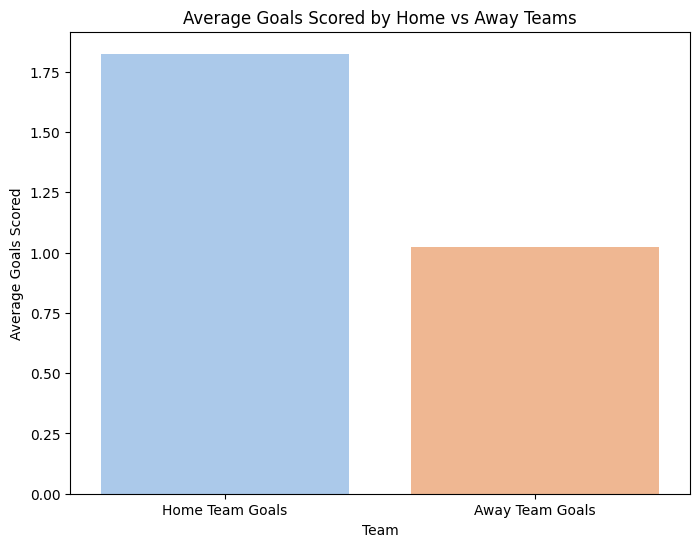

In [84]:
# Calculating average goals scored by home and away teams
home_goals = data1['Home Team Goals'].mean()
away_goals = data1['Away Team Goals'].mean()

plt.figure(figsize=(8, 6))
sns.barplot(x=['Home Team Goals', 'Away Team Goals'], y=[home_goals, away_goals], palette='pastel', hue = ['Home Team Goals', 'Away Team Goals'], legend=False)
plt.title('Average Goals Scored by Home vs Away Teams')
plt.xlabel('Team')
plt.ylabel('Average Goals Scored')
plt.show()


8. **Average Goals Scored by Home vs Away Teams:** Home teams tend to score slightly more goals on average compared to away teams, suggesting a home advantage.

---



# **TOP 10 COUNTRIES WITH MOST NUMBER OF PLAYERS IN WCs**

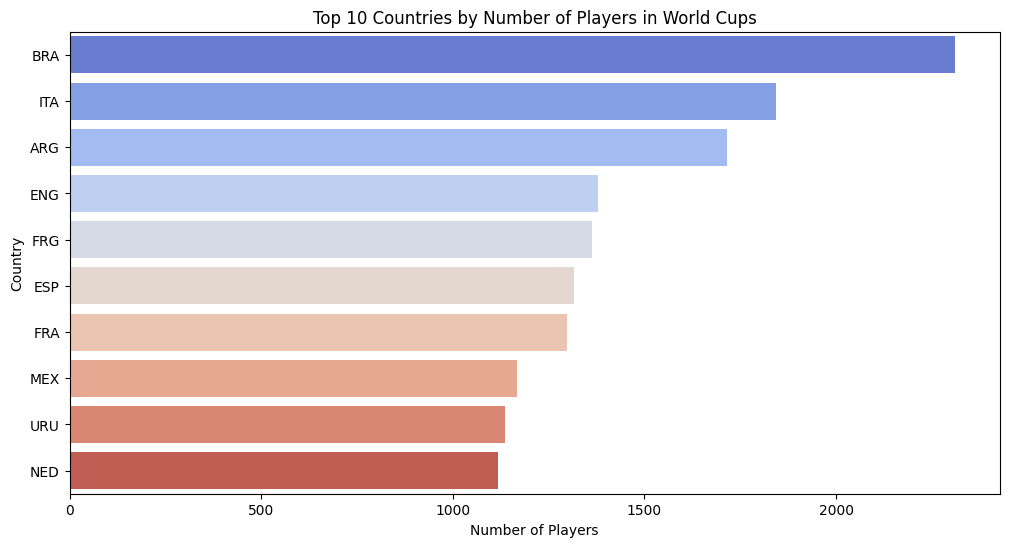

In [85]:
top_countries = data2['Team Initials'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(y=top_countries.index, x=top_countries.values, palette='coolwarm', hue = top_countries.index, legend=False)
plt.title('Top 10 Countries by Number of Players in World Cups')
plt.xlabel('Number of Players')
plt.ylabel('Country')
plt.show()


9. **Top 10 Countries with Most Number of Players in World Cups:** Brazil has the most player appearances in World Cups, signifying the depth and talent pool of the country.

---



# **WIN RATIO OF HOME AND AWAY TEAM**

In [86]:
def winner(data1):
    if data1['Home Team Goals'] > data1['Away Team Goals']:
        return 'Home team won'
    elif data1['Home Team Goals'] < data1['Away Team Goals']:
        return 'Away Team won'

In [87]:
data1['winner']=data1.apply(lambda x:winner(x),axis=1)
data1['winner'].value_counts()

,count
winner,
Home team won,479
Away Team won,171


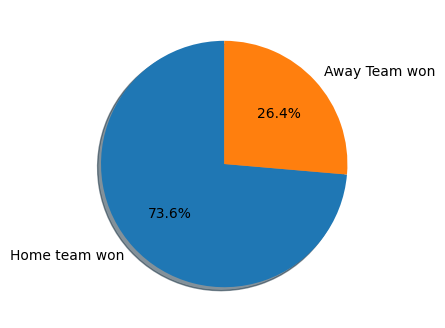

In [88]:
labels=['Home team won','Away Team won']
sizes=[486,174]
fig, ax = plt.subplots(figsize= (4, 4), dpi = 100)
explode = (0.1, 0, 0)
ax.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True,
      startangle = 90)

plt.show()

10. **Win Ratio of Home and Away Team:** The pie chart visually represents that home teams have a significantly higher win ratio compared to away teams.It may be due to home support and favourable match conditions.

---



# **TOP 10 COUNTRIES WITH MOST NUMBER OF WINS IN WCs (HOME AND AWAY)**

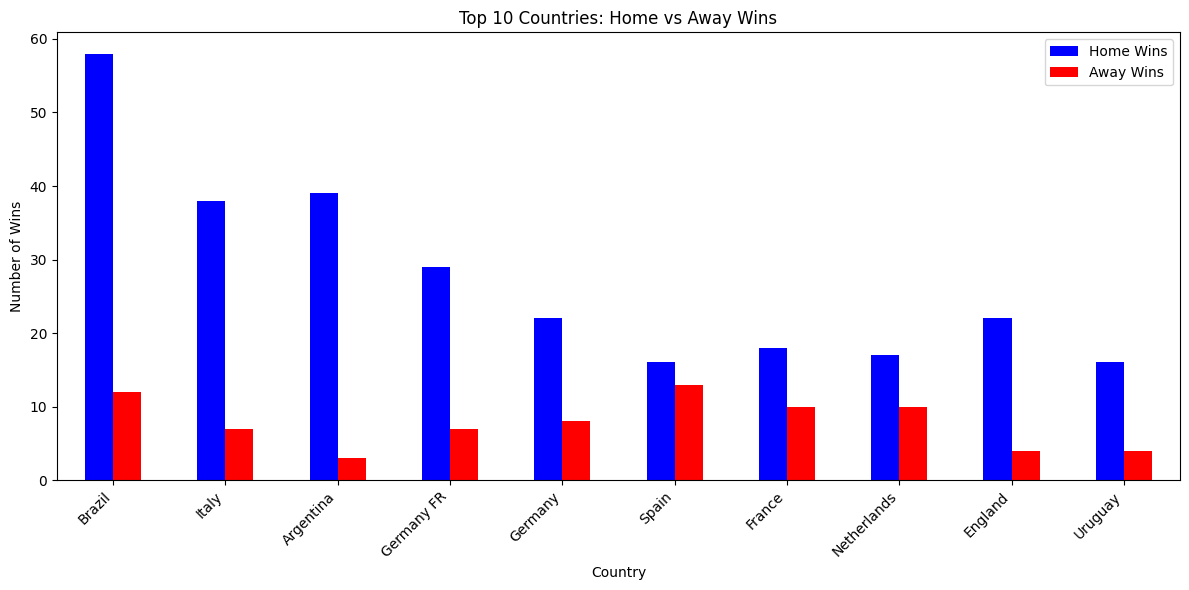

In [89]:
# Calculating home wins
home_wins = data1[data1['winner'] == 'Home team won'].groupby('Home Team Name')['winner'].count()

# Calculating away wins
away_wins = data1[data1['winner'] == 'Away Team won'].groupby('Away Team Name')['winner'].count()

# Combining home and away wins into a single DataFrame
wins_df = pd.concat([home_wins, away_wins], axis=1, keys=['Home Wins', 'Away Wins'])

# Filling NaN values with 0 (countries with no wins in a category)
wins_df = wins_df.fillna(0)

# Selecting the top 10 countries by total wins (home + away)
top_10_countries = wins_df.sum(axis=1).sort_values(ascending=False).head(10).index

# Filtering the wins_df for the top 10 countries
top_10_wins = wins_df.loc[top_10_countries]

top_10_wins.plot(kind='bar', figsize=(12, 6), color=['blue', 'red'])
plt.title('Top 10 Countries: Home vs Away Wins')
plt.xlabel('Country')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')
plt.legend(['Home Wins', 'Away Wins'], loc='upper right')
plt.tight_layout()
plt.show()

11. **Top 10 Countries with Most Number of Wins in World Cups (Home and Away):** Brazil is the most successful country in the competetion, demonstrating strength both at home and away. Germany is also a strong contender. Home wins are generally higher for top-performing countries.

---

